In [ ]:
!pip install pandas-profiling sklearn

In [35]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv(na_values='?',filepath_or_buffer='./adult.csv')

In [52]:
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [20]:
data.profile_report(style={'full_width':True},correlations={'phi_k':True,'cramers':False,'pearson':False,'spearman':False,'kendall':False,'recoded':False})

## Observations
- Dataset has 24 duplicate rows, - which has to be removed

- `native.country` (Categorical) has 583 (1.8%) missing values 
    - *This will be replaced with ode value, as mentioned in the Assignment statement*

- `occupation` (Categorical) has 1843 (5.7%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    - *Top 3 values frequencies are 12.7%, 12.6% and 12.5% , which are so close, so replacing 5.7% (1843) missing values with Mode value should be double checked. Still we will stick to the assignment statement*

- `workclass` has 1836 (5.6%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    



## Pre-Processing

#### Removing Duplicates

In [53]:
#code to remove dupicates from data
data = data.drop_duplicates()

#### Replacing Missing Values (with Mode)
- `native.country`
- `occupation`
- `workclass`

In [54]:
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])

For doing Bivariate analysis followed below link
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

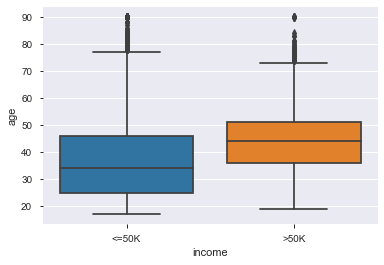

In [55]:
sns.boxplot(x='income',y='age', data=data)
plt.show()

In [56]:
# Age - Let it be continious varibale for now we can change it to bins later

https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas

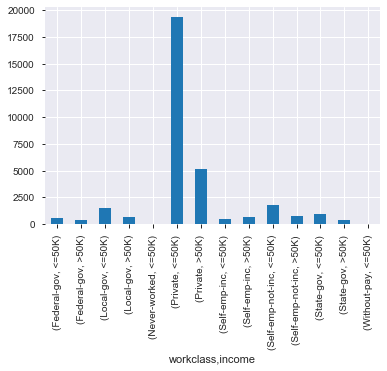

In [57]:
data.groupby(['workclass', 'income']).count()['age'].plot.bar(stacked=True)

#### Workclass 
- `Without-pay` , `Never-worked` did not even present in 1% of data set hence marking it as others - this class 100% falls under <=50K category of income
- One-Hot encoding

In [58]:
data['workclass'] = data['workclass'].replace(['Without-pay','Never-worked' ] , ['others','others'])

#doing onehot encoding 
column_name='workclass'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

#### Replace income variable with 1 or 0 

In [26]:
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

In [59]:
data

age  fnlwgt     education  education.num      marital.status  \
0       90   77053       HS-grad              9             Widowed   
1       82  132870       HS-grad              9             Widowed   
2       66  186061  Some-college             10             Widowed   
3       54  140359       7th-8th              4            Divorced   
4       41  264663  Some-college             10           Separated   
...    ...     ...           ...            ...                 ...   
32556   22  310152  Some-college             10       Never-married   
32557   27  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40  154374       HS-grad              9  Married-civ-spouse   
32559   58  151910       HS-grad              9             Widowed   
32560   22  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  ...  \
0         Prof-specialty  Not-in-family  White  Female             0  ...   
1        Exec-managerial  Not-in-family  White  Female             0  ...   
2         Prof-specialty      Unmarried  Black  Female             0  ...   
3      Machine-op-inspct      Unmarried  White  Female             0  ...   
4         Prof-specialty      Own-child  White  Female             0  ...   
...                  ...            ...    ...     ...           ...  ...   
32556    Protective-serv  Not-in-family  White    Male             0  ...   
32557       Tech-support           Wife  White  Female             0  ...   
32558  Machine-op-inspct        Husband  White    Male             0  ...   
32559       Adm-clerical      Unmarried  White  Female             0  ...   
32560       Adm-clerical      Own-child  White    Male             0  ...   

       hours.per.week  native.country income workclass_Federal-gov  \
0                  40   United-States  <=50K                     0   
1                  18   United-States  <=50K                     0   
2                  40   United-States  <=50K                     0   
3                  40   United-States  <=50K                     0   
4                  40   United-States  <=50K                     0   
...               ...             ...    ...                   ...   
32556              40   United-States  <=50K                     0   
32557              38   United-States  <=50K                     0   
32558              40   United-States   >50K                     0   
32559              40   United-States  <=50K                     0   
32560              20   United-States  <=50K                     0   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  1                       0   
1                        0                  1                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
32556                    0                  1                       0   
32557                    0                  1                       0   
32558                    0                  1                       0   
32559                    0                  1                       0   
32560                    0                  1                       0   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_others  
0                               0                    0                 0  
1                               0                    0                 0  
2                               0                    0                 0  
3                               0                    0                 0  
4                               0                    0                 0  
...                           ...                  ...       

#### Preprocessing steps are verified  
 - Row number before and after duplicate removal - Also with Data Profiling after pre-processing
 - Mode replace - with row indexed 0 and 2

In [30]:
data.profile_report(style={'full_width':True},correlations={'phi_k':True,'cramers':True,'pearson':True,'spearman':True,'kendall':True,'recoded':True})

In [ ]:
# will add more pre processing logics 

#### Extract X and Y colummns

In [ ]:
df_label_col = data['income'] 
df_feature_col = data.drop(['y'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_feature_col, df_label_col,
                                                    test_size=0.20,
                                                    random_state=91,
                                                    stratify=df_label_col)